In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("Installation Cost.csv")
df.head(3)

,Total Roof Top Area (in Sq. m.),Percent of Roof Top Area available,Installation Cost
0,100,10,47000.0
1,100,20,86000.0
2,100,25,107500.0


In [32]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Training the complete model on X
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

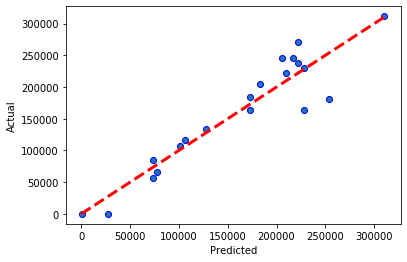

The model performance for testing set
--------------------------------------
MAE is 20943.7449313827
MSE is 843312529.2828457
R2 score is 0.8872160945204765


In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

In [36]:
import coremltools
coreml_model = coremltools.converters.sklearn.convert(regressor)

NameError: name '_tree' is not defined